<a href="https://colab.research.google.com/github/mindyng/Projects/blob/master/NLP_Profiler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U emoji

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=a6a1107992f8efc59dfe8e9f4374c28108837b4b776a945aa534199c7b7cba4c
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [2]:
!pip install -U nltk

     |████████████████████████████████| 1.4MB 3.4MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=1ffc10af04dd4ca5d921609b837d15ac754bbd755fe5ddaa459068ae31854bf0
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [3]:
!pip install -U textblob

Requirement already up-to-date: textblob in /usr/local/lib/python3.6/dist-packages (0.15.3)


In [4]:
%%time
%%bash

echo "OSTYPE=$OSTYPE"
if [[ "$OSTYPE" == "cygwin" ]] || [[ "$OSTYPE" == "msys" ]] ; then
    echo "Windows or Windows-like environment detected, script not tested, and may not work."
    echo "Try installing the components mention in the install-[ostype].sh scripts manually."
    echo "Or try running under CGYWIN or git-bash."
    echo "If successfully installed, please contribute back with the solution via a pull request, to https://github.com/neomatrix369/awesome-ai-ml-dl/"
    echo "Please give the file a good name, i.e. install-windows.sh or install-windows.bat depending on what kind of script you end up writing"
    exit 0
elif [[ "$OSTYPE" == "linux-gnu" ]] || [[ "$OSTYPE" == "linux" ]]; then
    TARGET_OS="linux"
else
    TARGET_OS="macos"
fi

if [[ -e ../../library/org/neomatrix369 ]]; then
  echo "Library source found"
  
  cd ../../build
  
  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true
else
  if [[ -e awesome-ai-ml-dl/examples/better-nlp/library ]]; then
     echo "Library source found"
  else
     git clone "https://github.com/neomatrix369/awesome-ai-ml-dl" || true
  fi

  echo "Library source exists"
  cd awesome-ai-ml-dl/examples/better-nlp/build

  echo "Detected OS: ${TARGET_OS}"
  ./install-${TARGET_OS}.sh || true 
fi

OSTYPE=linux-gnu
Library source exists
Detected OS: linux
Please check if you fulfill the requirements mentioned in the README file.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InReleas

Cloning into 'awesome-ai-ml-dl'...
E: Package 'libnode64' has no installation candidate


CPU times: user 21.3 ms, sys: 9.91 ms, total: 31.2 ms
Wall time: 1min 2s


In [5]:
import sys
# sys.path.insert(0, '../../library') <=== isn't working due to error on Google Colab, I suggest use the below for now
sys.path.insert(0, 'awesome-ai-ml-dl/examples/better-nlp/library')

from org.neomatrix369.nlp_profiler import apply_text_profiling

import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Various text messages with different content.

In [6]:
text_with_emojis = "I love ⚽ very much 😁."
text_with_a_number = '2833047 people live in this area. It is not a good area.'
text_with_two_numbers = '2833047 and 1111 people live in this area.'
text_with_punctuations = "This sentence doesn't seem to too many commas, periods or semi-colons (;)."
text_with_a_date = "Todays date is 04/28/2020 for format mm/dd/yyyy, not 28/04/2020."
text_with_dates = "Todays date is 28/04/2020 and tomorrow's date is 29/04/2020."
text_with_duplicates = 'Everyone here is so hardworking. Hardworking people. I think hardworking people are a good trait in our company.'

In [7]:
data = [text_with_emojis, text_with_a_number, text_with_two_numbers, 
        text_with_punctuations, text_with_a_date, text_with_dates, text_with_duplicates]
text_dataframe = pd.DataFrame(data, columns=['text'])
text_dataframe

text
0                              I love ⚽ very much 😁.
1  2833047 people live in this area. It is not a ...
2         2833047 and 1111 people live in this area.
3  This sentence doesn't seem to too many commas,...
4  Todays date is 04/28/2020 for format mm/dd/yyy...
5  Todays date is 28/04/2020 and tomorrow's date ...
6  Everyone here is so hardworking. Hardworking p...

Pandas' familiar describe() function.

In [8]:
text_dataframe.describe()

text
count                                                   7
unique                                                  7
top     Everyone here is so hardworking. Hardworking p...
freq                                                    1

The usual output for describe() are descriptive stat's: count, unique, top, freq, mean, std dev.

Here we do something similar with text with NLP profiler.

In [9]:
profiled_text_dataframe = apply_text_profiling(text_dataframe, 'text')
profiled_text_dataframe.head()

text  ...  dates_count
0                              I love ⚽ very much 😁.  ...            0
1  2833047 people live in this area. It is not a ...  ...            0
2         2833047 and 1111 people live in this area.  ...            0
3  This sentence doesn't seem to too many commas,...  ...            0
4  Todays date is 04/28/2020 for format mm/dd/yyy...  ...            1

[5 rows x 20 columns]

Sentiment Analysis

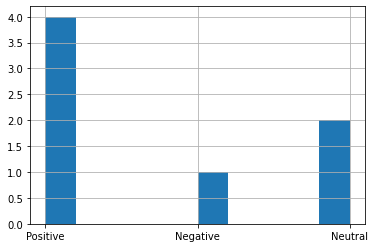

In [10]:
profiled_text_dataframe['sentiment_polarity'].hist()

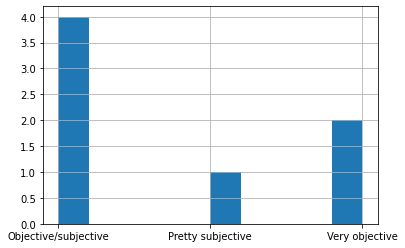

In [11]:
profiled_text_dataframe['sentiment_subjectivity'].hist()

Spelling quality check.

The spelling score and spelling quality check is upto 70% accurate, it's using Peter Norvig’s “How to Write a Spelling Corrector".

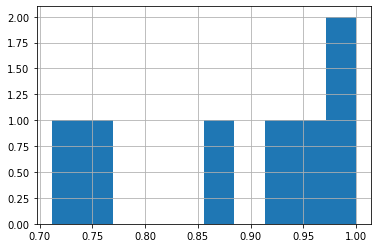

In [12]:
profiled_text_dataframe['spellcheck_score'].hist()

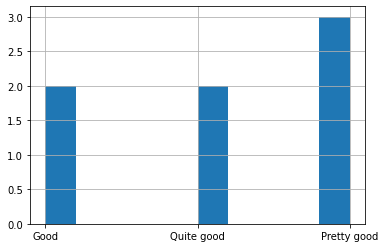

In [13]:
profiled_text_dataframe['spelling_quality'].hist()


Resources:

https://www.kaggle.com/raenish/cheatsheet-text-helper-functions
https://textblob.readthedocs.io/en/dev/quickstart.html